In [36]:
from skimage.color import rgb2gray
import skimage.transform
import scipy.ndimage as ndimage
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from skimage.io import imread
import skimage.exposure

In [54]:
def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))

In [38]:
plt.gray() # makes image plots grayscale

lena = rgb2gray(imread('lena.tiff'))
lena.astype(np.float64)
cameraman = imread('cameraman.tif').astype(np.float64) / 255

h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])
# print((lena[0][0]))

results = [signal.convolve2d(lena, h1), signal.convolve2d(lena, h2), signal.convolve2d(lena, h3)]  # convolution is commutative (order does not matter)

<Figure size 640x480 with 0 Axes>

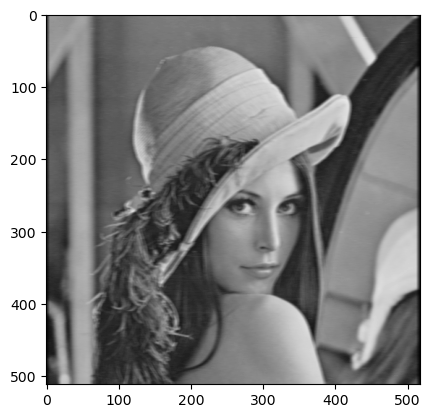

In [39]:
plt.imshow(results[0], vmin=0, vmax=1)  #vmin and vmax shift scales the lowest observed values to all the way to 0 (e.g. if lowest intensity of the image is 4, this will be mapped to 0. same with the highest intensity will be mapped to 1)

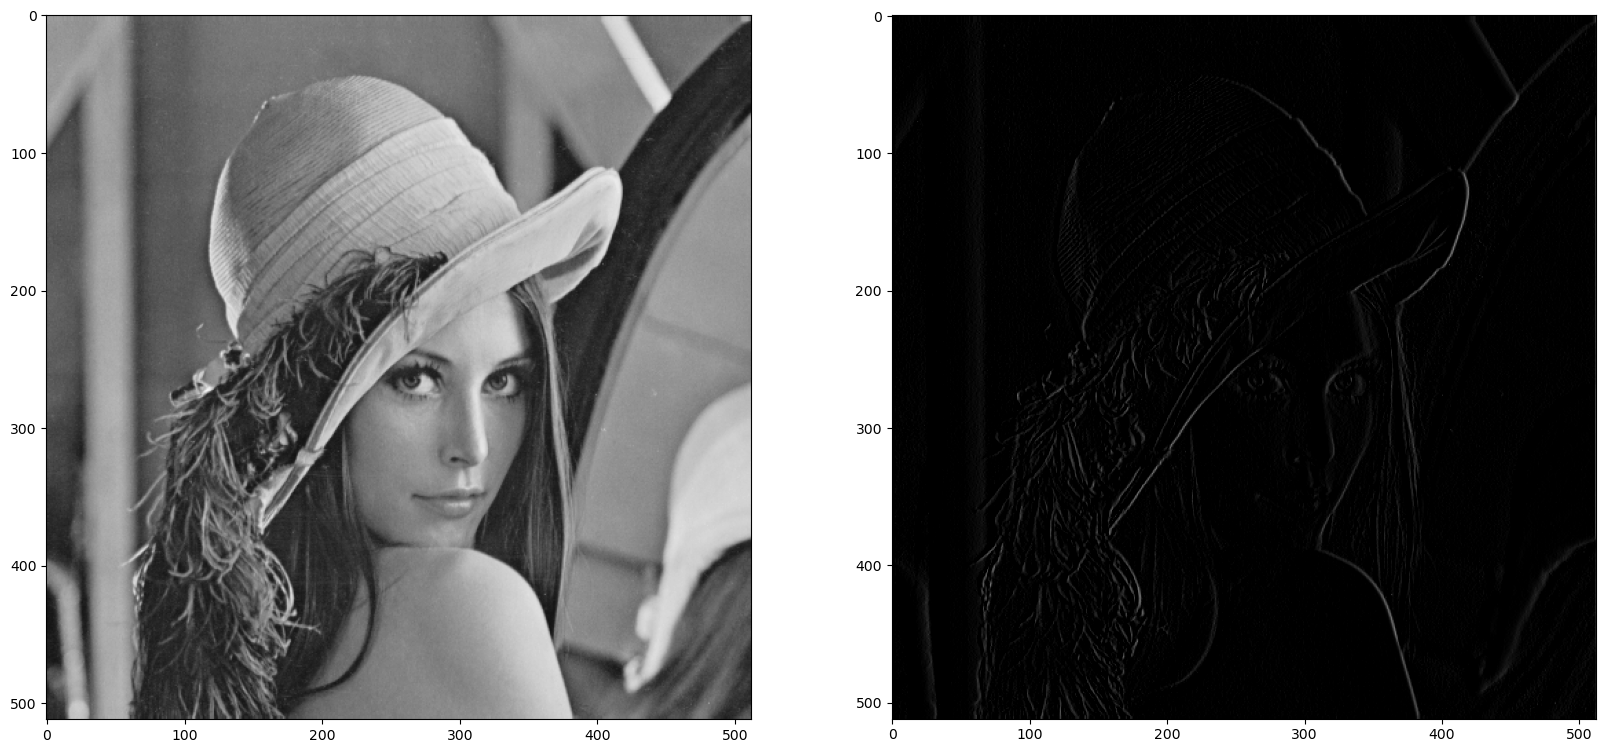

In [40]:
fig = plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.imshow(lena, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.imshow(results[2], vmin=0, vmax=1)  # h1 transformation

[[ 0.13611784 -0.14816702 -0.18924286 ...  0.16958901 -0.01876642
  -0.26205627]
 [ 0.02953904 -0.30014747  0.1062543  ... -0.0545942  -0.19535078
   0.23954436]
 [-0.03029662 -0.15255764  0.29991613 ...  0.03423437 -0.32732786
  -0.32429673]
 ...
 [-0.21094795  0.23498042  0.25170597 ... -0.27720835 -0.23689905
  -0.03558222]
 [ 0.04926045  0.14111657  0.29424237 ...  0.09167323  0.16574089
  -0.0466204 ]
 [-0.21198225  0.02921645  0.11484923 ... -0.02466717 -0.26319335
  -0.10894462]]


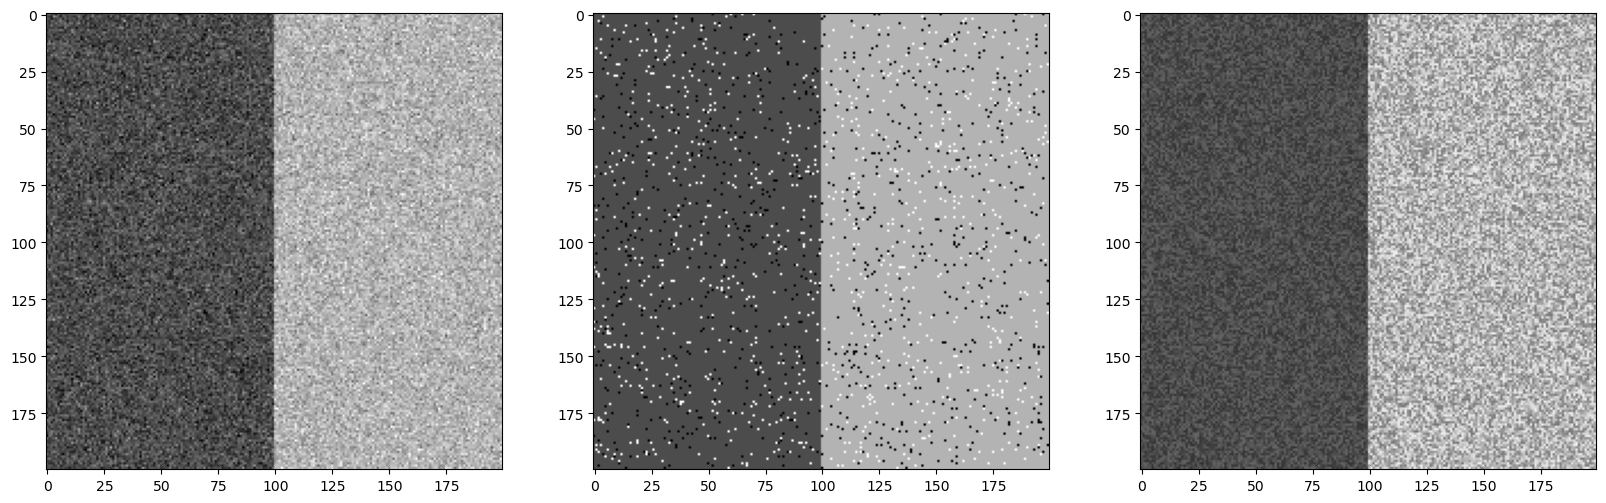

In [41]:
# 3 - Noise Generation
f = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])  # toy image generation || np.hstack = Stack arrays in sequence horizontally (column wise).

np.random.seed(123)
def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(f.shape[0], f.shape[1]) - 0.5)
    print(n)
    return im + im * n

images_to_display = []

# Zero-mean Gaussian (variance = 0.01)
gaussian_output = skimage.util.random_noise(f, mode="gaussian", mean=0, var=0.01)  #specified (default) parameters for clarity
images_to_display.append(gaussian_output)

# Salt & Pepper (noise density = 0.05)
sp_output = skimage.util.random_noise(f, mode="s&p", amount=0.05)
images_to_display.append(sp_output)

# Multiplicaive Speckle Noise (variance = 0.04)
speckle_output = imnoise_speckle(f, 0.04)
images_to_display.append(speckle_output)

fig = plt.figure(figsize=(20, 10))
for i in range(len(images_to_display)):
    plt.subplot(1, len(images_to_display), i+1)
    plt.imshow(images_to_display[i], vmin=0, vmax=1)

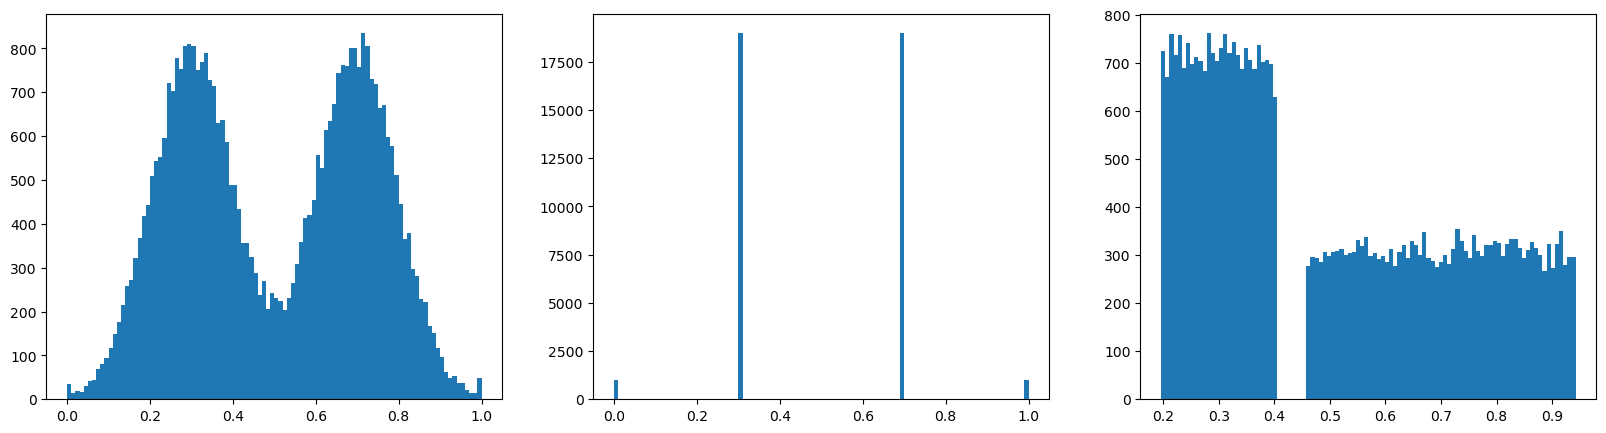

In [42]:
hist_to_display = []
gaussian_hist = gaussian_output.flatten()
hist_to_display.append(gaussian_hist)

sp_hist = sp_output.flatten()
hist_to_display.append(sp_hist)

speckle_hist = speckle_output.flatten()
hist_to_display.append(speckle_hist)

hists = plt.figure(figsize=(20, 5))
for i in range(len(hist_to_display)):
    plt.subplot(1, len(hist_to_display), i+1)
    plt.hist(hist_to_display[i], 100)



27.007883154617424

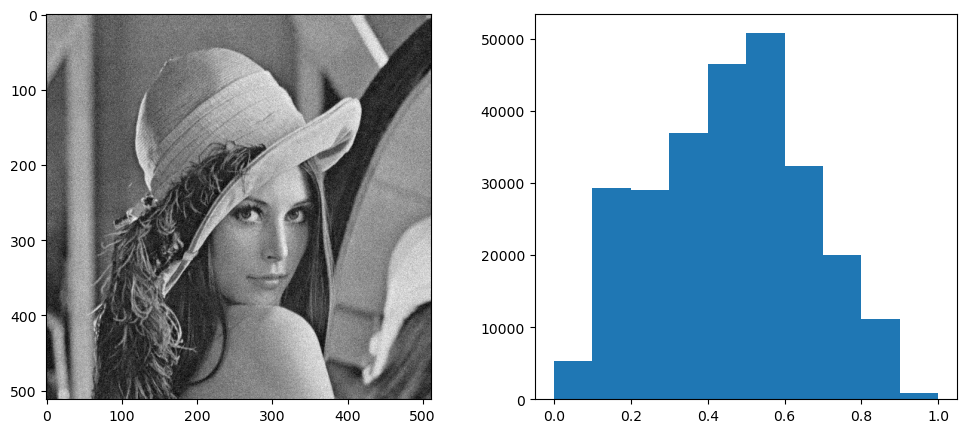

In [43]:
# 4 - Noise Reduction in the Spatial Domain

lena_gaussian_noise = skimage.util.random_noise(lena, mode="gaussian", mean=0, var=0.002)  #specified (default) parameters for clarity
lena_gaussian_hist = lena_gaussian_noise.flatten()

# > Plotting Lena gaussian noise + histogram
lena_noises = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena_gaussian_noise, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(lena_gaussian_hist)
PSNR(lena, lena_gaussian_noise)

In [ ]:
# Plots the pre-noise lena
lena_hist = lena.flatten()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(lena, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(lena_hist)


In [ ]:
averaging_filter = np.ones((3, 3)) / (3.0 * 3.0)
plt.imshow(averaging_filter, vmin=0, vmax=1)
plt.colorbar()

31.611745456293928

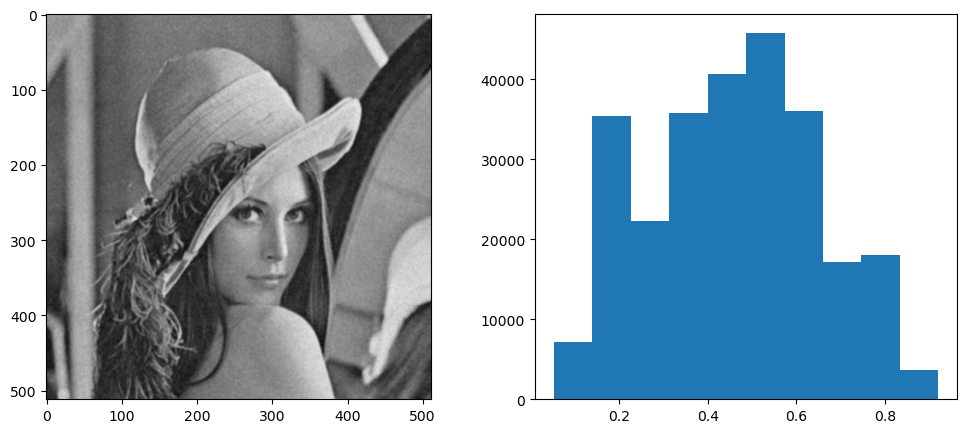

In [46]:
# 3X3 Averaging Filter Kernel
result = ndimage.convolve(lena_gaussian_noise, averaging_filter)
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

27.065843906439333

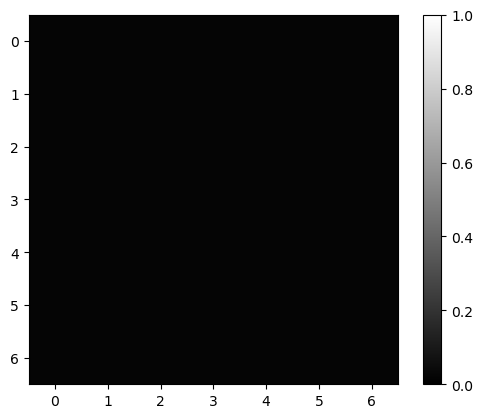

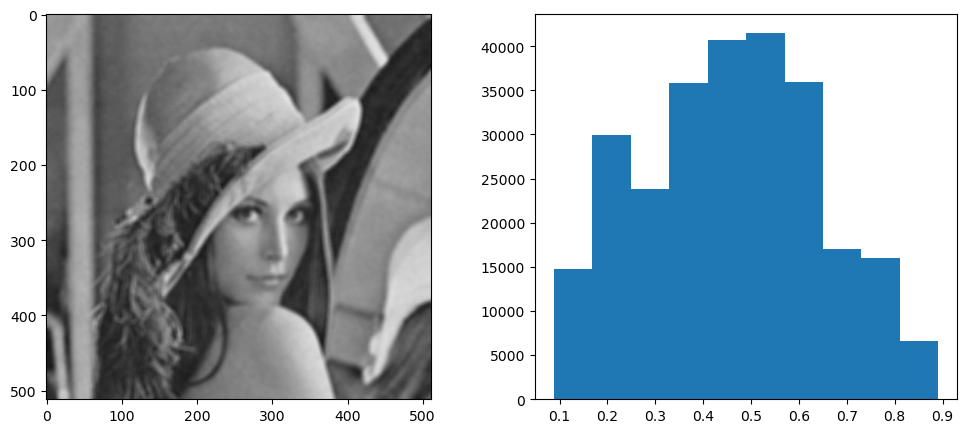

In [50]:
# 7x7 Averaging Filter Kernel
averaging_filter = np.ones((7, 7)) / (7.0 * 7.0)
result = ndimage.convolve(lena_gaussian_noise, averaging_filter)
result_hist = result.flatten()
plt.imshow(averaging_filter, vmin=0, vmax=1)
plt.colorbar()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

31.621940332495843

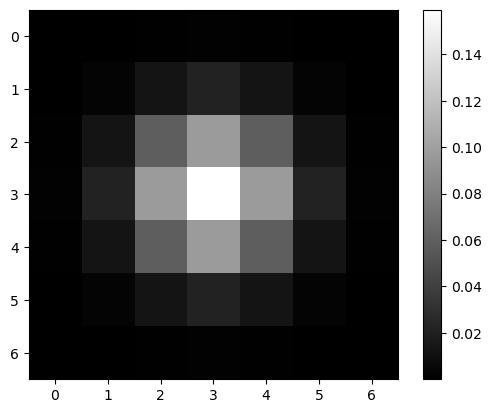

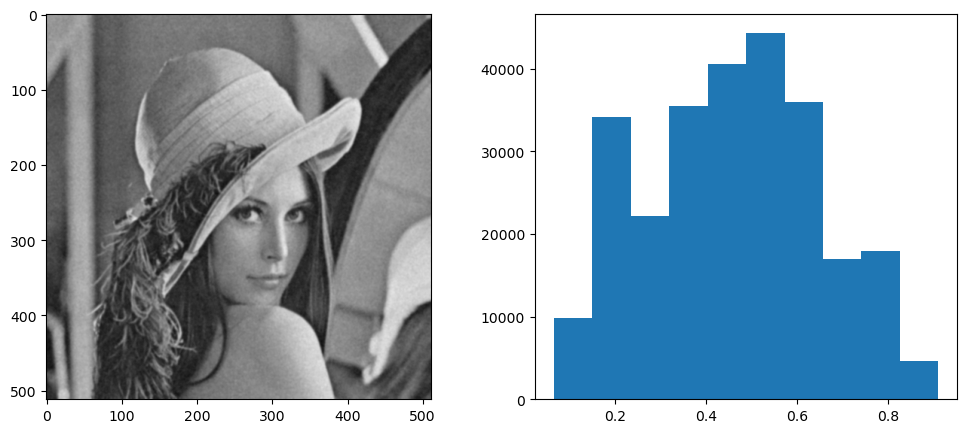

In [58]:
# 7x7 Gaussian Filter Kernel
gauss_filter = gaussian_filter(7, 7, 1)
result = ndimage.convolve(lena_gaussian_noise, gauss_filter)
result_hist = result.flatten()
plt.imshow(gauss_filter)
plt.colorbar()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

7x7 Average Filter: 26.200783549228852
7x7 Gaussian Filter: 27.406255352890806


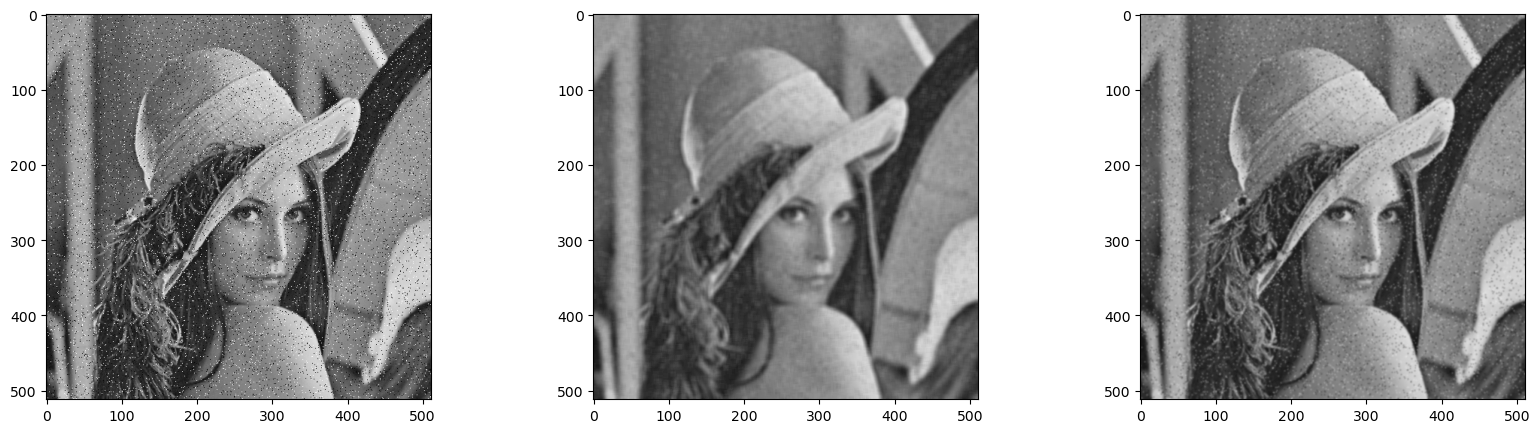

In [57]:
# 7x7 Gaussian Filter Kernel
filters_images_to_display = []

# New Salt and Pepper Image
lena_sp_output = skimage.util.random_noise(lena, mode="s&p", amount=0.05)
filters_images_to_display.append(lena_sp_output)

# Filters
averaging_filter = np.ones((7, 7)) / (7.0 * 7.0)
lena_gaussian_filter = gaussian_filter(7, 7, 1)

# Average Filter Convolved
lena_avg__sp_fix = ndimage.convolve(lena_sp_output, averaging_filter)
filters_images_to_display.append(lena_avg__sp_fix)
print("7x7 Average Filter: " + str(PSNR(lena, lena_avg__sp_fix)))

# Gaussian Filter Convolved
lena_gaus__sp_fix = ndimage.convolve(lena_sp_output, lena_gaussian_filter)
filters_images_to_display.append(lena_gaus__sp_fix)
print("7x7 Gaussian Filter: " + str(PSNR(lena, lena_gaus__sp_fix)))

lena_filter_fixes = plt.figure(figsize=(20, 5))
for i in range(len(filters_images_to_display)):
    plt.subplot(1, len(filters_images_to_display), i+1)
    plt.imshow(filters_images_to_display[i], vmin=0, vmax=1)

(array([11424., 29599., 25366., 35673., 42877., 45005., 34779., 17942.,
        15925.,  3554.]),
 array([0.07553284, 0.15907977, 0.24262669, 0.32617362, 0.40972055,
        0.49326747, 0.5768144 , 0.66036132, 0.74390825, 0.82745517,
        0.9110021 ]),
 <BarContainer object of 10 artists>)

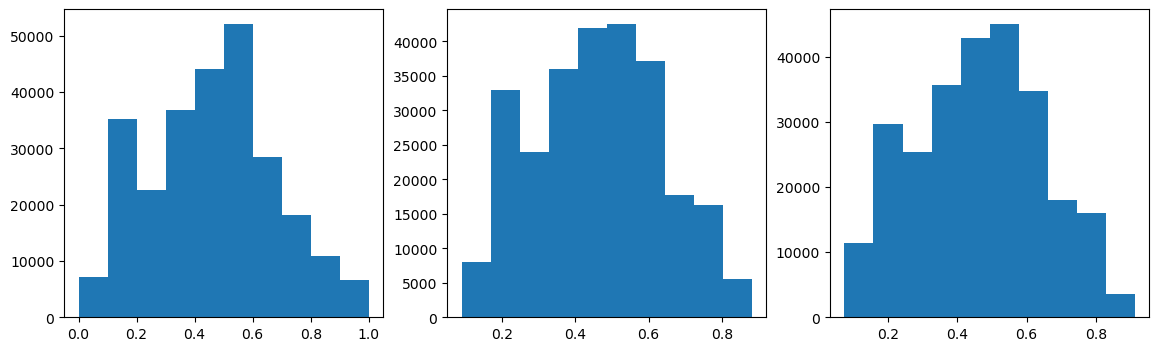

In [ ]:
lena_sp_hist = lena_sp_output.flatten()
lena_avg_hist = lena_avg__sp_fix.flatten()
lena_gaus_hist = lena_gaus__sp_fix.flatten()

lena_filter_hists = plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.hist(lena_sp_hist)

plt.subplot(1, 3, 2)
plt.hist(lena_avg_hist)

plt.subplot(1, 3, 3)
plt.hist(lena_gaus_hist)

In [ ]:
lena_sp_output = skimage.util.random_noise(lena, mode="s&p", amount=0.05)

34.26991058492233

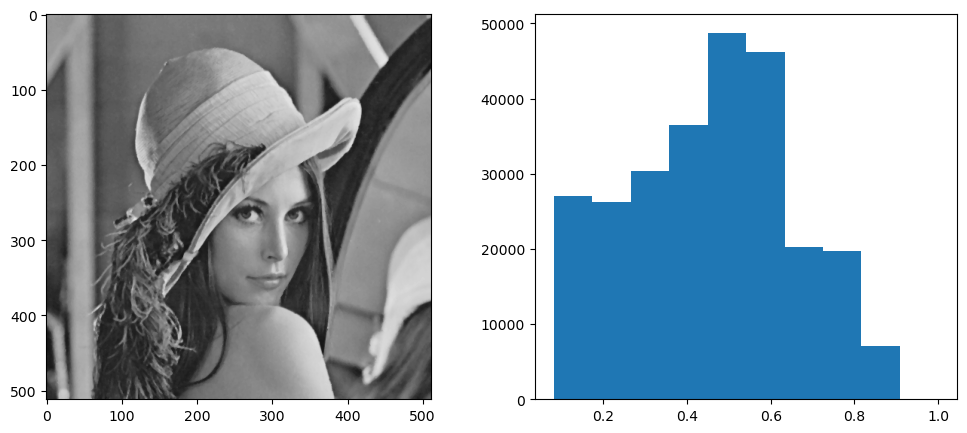

In [ ]:
result = ndimage.median_filter(lena_sp_output, size=(3, 3))
result_hist = result.flatten()

results = plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(result, vmin=0, vmax=1)
plt.subplot(1, 2, 2)
plt.hist(result_hist)

PSNR(lena, result)

# Section 5 - Sharpening in Spatial Domain (cameraman)

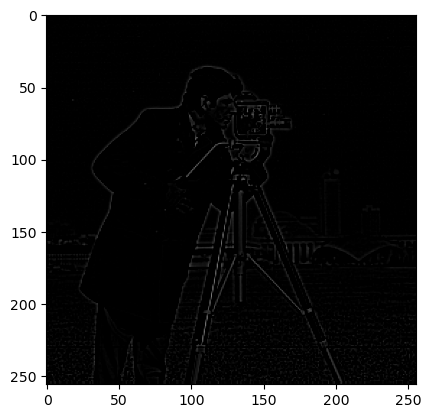

In [ ]:
gf = gaussian_filter(7, 7, 1)
filtered_camerman = ndimage.convolve(cameraman, gf)
subtracted = cameraman - filtered_camerman
plt.imshow(subtracted, vmax=1, vmin=0)

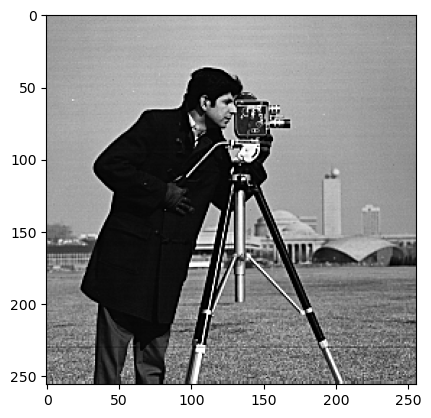

In [ ]:
result_add = cameraman + subtracted
plt.imshow(result_add, vmax=1, vmin=0)

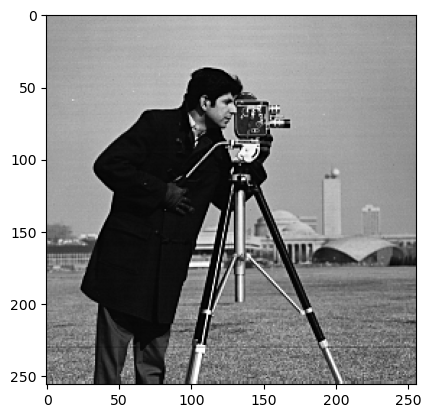

In [ ]:
result_mul = cameraman + 0.5 * subtracted
plt.imshow(result_mul, vmax=1, vmin=0)